In [1]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json, csv

%matplotlib inline

In [2]:
df = pd.read_csv('AMD_2018-10-25_stock.csv', sep=';')
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df.ds)
df['y'] = np.log(df['y'])

In [3]:
train_df = df[:-20]

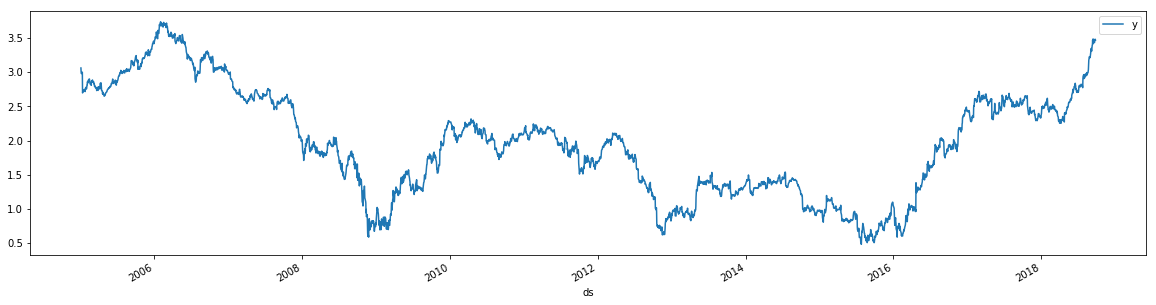

In [4]:
train_df.set_index('ds').plot(figsize=(20, 5))

In [18]:
%%time
m1 = Prophet(growth='linear', seasonality_mode='multiplicative', n_changepoints = 5, changepoint_prior_scale=0.01, changepoint_range = 1)
m1.fit(train_df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 4.47 s, sys: 58.1 ms, total: 4.53 s
Wall time: 4.74 s


In [ ]:
%%time
df_cv = cross_validation(m1, initial='1500 days', period='90 days', horizon = '50 days')

INFO:fbprophet.diagnostics:Making 39 forecasts with cutoffs between 2009-03-27 00:00:00 and 2018-08-07 00:00:00


In [16]:
df_p = performance_metrics(df_cv, rolling_window=1)
df_p

,horizon,mse,rmse,mae,mape,coverage
1340,50 days,0.193492,0.439877,0.356351,0.236949,0.482476


In [17]:
df_p

,horizon,mse,rmse,mae,mape,coverage
1340,50 days,0.193492,0.439877,0.356351,0.236949,0.482476


In [10]:
#fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [26]:
n_forecast = 30
future1 = m1.make_future_dataframe(periods=n_forecast)

In [27]:
%%time
forecast1 = m1.predict(future1)

CPU times: user 20 s, sys: 1.27 s, total: 21.3 s
Wall time: 19.1 s


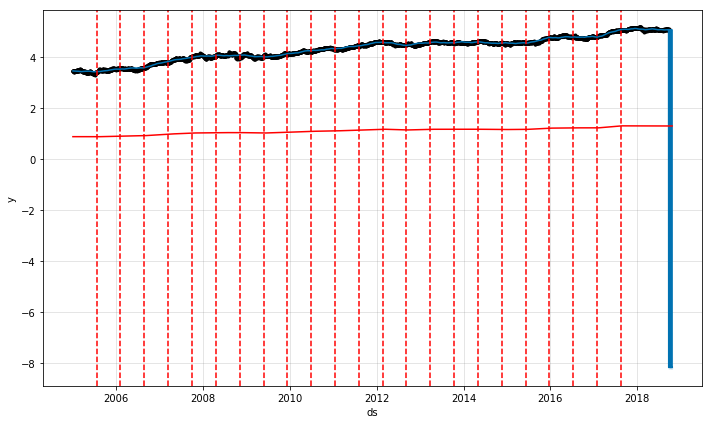

In [29]:
fig = m1.plot(forecast1)
a = add_changepoints_to_plot(fig.gca(), m1, forecast1)

In [18]:
forecast1 = forecast1[forecast1['ds'].dt.dayofweek < 5]

forecast1_norm = pd.concat([
        forecast1['ds'],
        np.exp(df['y']),
        np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']])
    ], axis=1)

In [19]:
forecast1_norm.tail(100)

,ds,y,yhat,yhat_lower,yhat_upper
3381,2018-06-08,168.910004,166.348501,151.264958,182.812386
3382,2018-06-11,166.490005,165.937682,151.742228,181.052377
3383,2018-06-12,166.729996,165.839859,151.470721,180.997781
3384,2018-06-13,166.580002,165.672471,150.765227,181.891485
3385,2018-06-14,167.050003,165.621629,151.016998,180.477946
3386,2018-06-15,166.460007,165.593465,150.616972,181.177527
3387,2018-06-18,166.279999,165.187098,150.606271,180.885432
3388,2018-06-19,164.970001,165.118161,150.515922,181.817550
3389,2018-06-20,162.559998,164.994939,150.290629,180.562769
3390,2018-06-21,160.529999,165.003103,151.327655,180.956597


Text(0.5, 1.0, 'Prophet forecast')

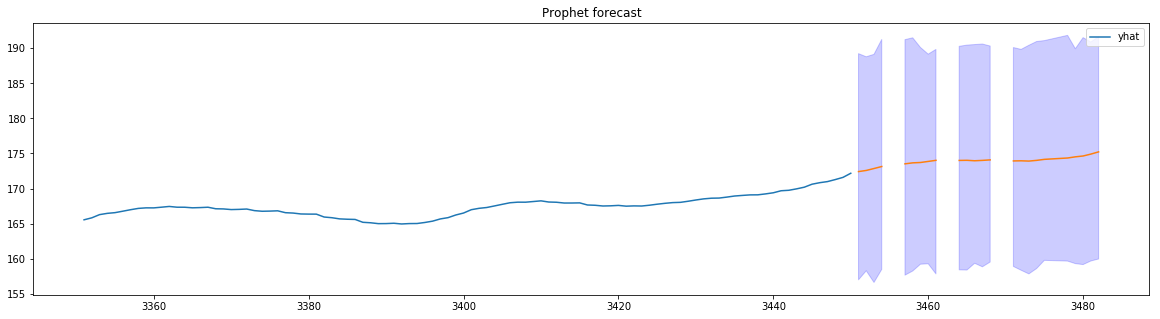

In [20]:
n_history = 100

forecast1_norm[-n_history-n_forecast:-n_forecast][['yhat']].plot(figsize=(20, 5))
plt.plot(forecast1_norm[-n_forecast:].index, forecast1_norm[-n_forecast:][['yhat']])
plt.fill_between(forecast1_norm[-n_forecast:].index, forecast1_norm[-n_forecast:]['yhat_lower'], forecast1_norm[-n_forecast:]['yhat_upper'], color='b', alpha=0.2)
plt.title('Prophet forecast')